<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/Cognitive_envarioments_20240611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar a função files.upload do google.colab
from google.colab import files
# Fazer upload do arquivo CSV
uploaded = files.upload()

# Importar a biblioteca pandas
import pandas as pd

# Nome do arquivo CSV
csv_filename = list(uploaded.keys())[0]

# Ler o CSV em um DataFrame
df = pd.read_csv(csv_filename)

# Exibir as primeiras linhas do DataFrame
df.head()


Saving enem_sample10k.csv to enem_sample10k.csv


<ipython-input-1-42a18beeb04f>:13: DtypeWarning: Columns (136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filename)


,HASHID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_TEMPO_ADICIONAL,TP_FAIXA_ETARIA
0,5020743927441300300,200001627225,2020,NaN,NaN,NaN,NaN,NaN,F,1.0,...,A,A,D,A,A,B,NaN,NaN,NaN,5.0
1,-5098962944298398439,200002192723,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,B,A,C,B,C,B,NaN,NaN,NaN,12.0
2,3437127682735460098,200005740708,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,A,A,E,A,A,B,NaN,NaN,NaN,6.0
3,-1985947034126707894,200001886277,2020,NaN,NaN,NaN,NaN,NaN,F,2.0,...,A,A,C,A,B,B,NaN,NaN,NaN,11.0
4,1710864359812960253,200006555845,2020,NaN,NaN,NaN,NaN,NaN,F,0.0,...,A,B,C,A,B,A,NaN,NaN,NaN,12.0


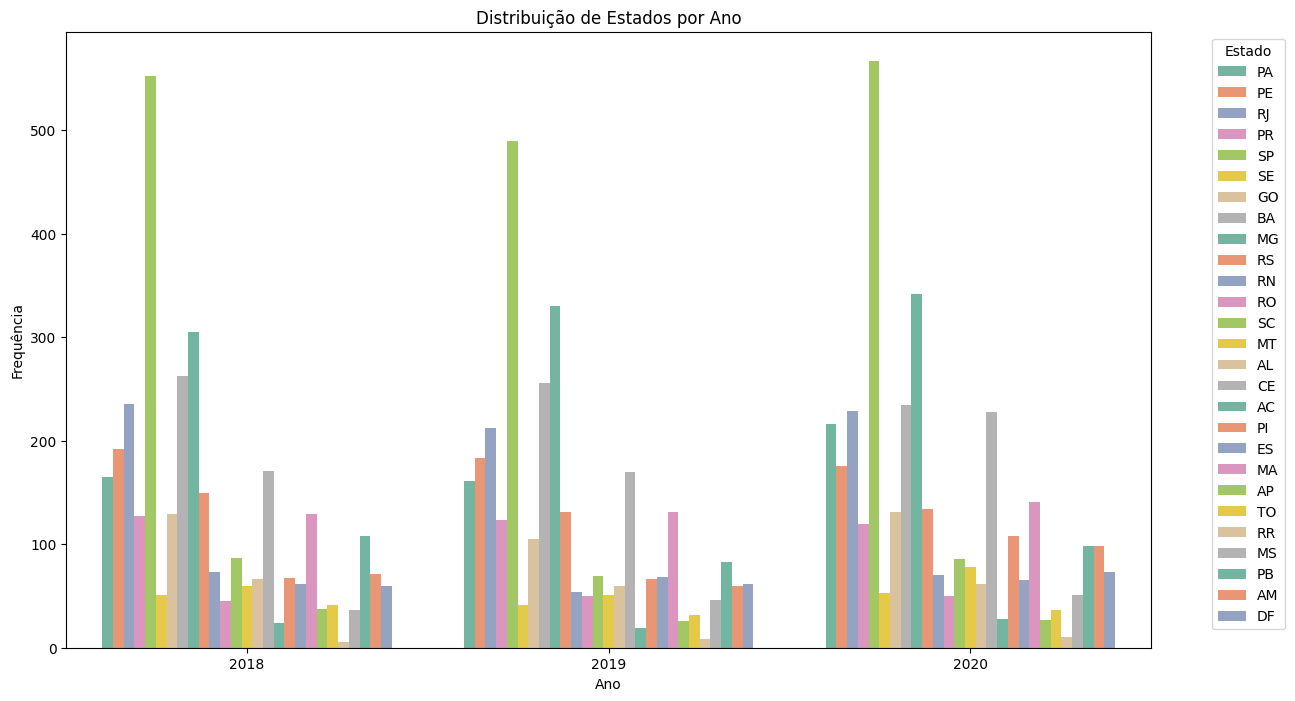

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar o gráfico de barras agrupadas
sns.countplot(data=df, x='NU_ANO', hue='SG_UF_PROVA', palette='Set2')

# Configurar os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.title('Distribuição de Estados por Ano')

# Mostrar a legenda fora do gráfico
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()


In [13]:
# Agrupar os dados por estado e ano e contar o número de provas aplicadas em cada grupo
grouped = df.groupby(['SG_UF_PROVA', 'NU_ANO']).size().reset_index(name='counts')

# Encontrar o ano com o maior número de provas aplicadas para cada estado
max_years_per_state = grouped.loc[grouped.groupby('SG_UF_PROVA')['counts'].idxmax()]

print(max_years_per_state)


   SG_UF_PROVA  NU_ANO  counts
2           AC    2020      28
3           AL    2018      66
8           AM    2020      98
9           AP    2018      37
12          BA    2018     263
17          CE    2020     228
20          DF    2020      73
22          ES    2019      68
26          GO    2020     131
29          MA    2020     141
32          MG    2020     342
35          MS    2020      51
38          MT    2020      78
41          PA    2020     216
42          PB    2018     108
45          PE    2018     192
50          PI    2020     108
51          PR    2018     127
54          RJ    2018     236
57          RN    2018      73
61          RO    2019      50
65          RR    2020      10
66          RS    2018     150
69          SC    2018      87
74          SE    2020      53
77          SP    2020     567
78          TO    2018      41


In [15]:
# Ordenar os dados pelo número de provas aplicadas em ordem decrescente
max_overall = max_years_per_state.sort_values(by='counts', ascending=False).iloc[0]

print(f"O estado com mais provas aplicadas é {max_overall['SG_UF_PROVA']} no ano de {max_overall['NU_ANO']}, com {max_overall['counts']} ocorrências.")


O estado com mais provas aplicadas é SP no ano de 2020, com 567 ocorrências.


In [17]:
# Filtrar os dados para 2018 e participantes que fizeram a prova de matemática
df_2018 = df[(df['NU_ANO'] == 2018) & (df['TP_PRESENCA_MT'] == 1)]

# Selecionar a coluna de notas de matemática
notas_mt_2018 = df_2018['NU_NOTA_MT'].dropna()


In [18]:
# Calcular as métricas estatísticas
media = notas_mt_2018.mean()
mediana = notas_mt_2018.median()
primeiro_quartil = notas_mt_2018.quantile(0.25)
terceiro_quartil = notas_mt_2018.quantile(0.75)

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Primeiro Quartil (25%): {primeiro_quartil}")
print(f"Terceiro Quartil (75%): {terceiro_quartil}")


Média: 534.3408252853379
Mediana: 515.25
Primeiro Quartil (25%): 454.025
Terceiro Quartil (75%): 600.05
